# Bayes Player

Both the Markov and the Q player work by keeping track of a fixed window of
history, and use that as the state to decide the next action. They do not have long term assumptions about the game.

A rock-paper-scissors veteran might have built up knowledge about the patterns
of play they saw through their entire career and use it to inform every move. Let's try to simulate such a player with Bayesian inference.

In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

%load_ext autoreload
%autoreload 2

sys.path.append(os.path.abspath(os.path.join('..')))

from rps.state.tournament import play_tournament
from rps.players.weighted import Weighted
from rps.players.markov import Markov
from rps.players.bayes import Bayes
from rps.players.ensemble import Ensemble

We are interested in seeing how the Bayes player (Bary)'s belief about the game changes over time.

In [2]:
def plot_priors(priors):
    a = np.array(priors)
    plt.plot(a[:, 0], label='Rock')
    plt.plot(a[:, 1], label='Paper')
    plt.plot(a[:, 2], label='Scissors')
    plt.legend()
    plt.title('Belief Changes over Time')
    plt.show()

Let's check against the random player. We should see no changes to belief.


Randy               vs              Bary



████████████████████████████████████████


Tournament Stats:
Randy              Draw             Bary
33.05            33.38             33.57
----------------------------------------



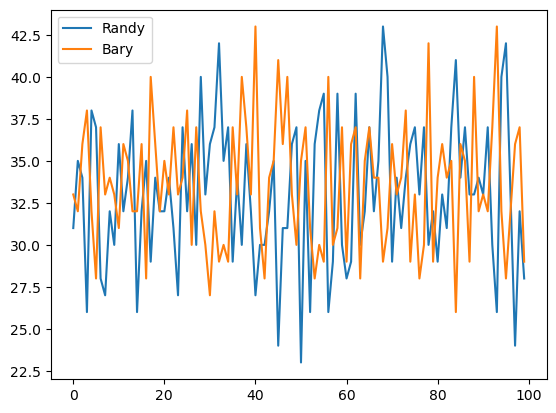

Final Belief: [0.10000243 0.79859967 0.1013979 ]


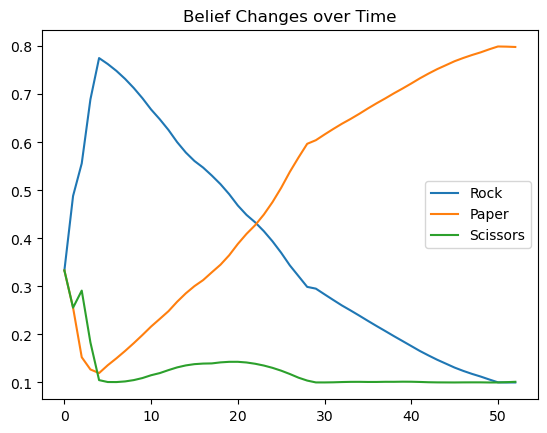

In [3]:
randy = Weighted(name="Randy")
priors_record = []
bary = Bayes(name="Bary", record=priors_record)
priors_record.append(bary.priors)
play_tournament(randy, bary, num_games=100, num_rounds=100, print_plot=True)
print(f"Final Belief: {bary.priors}")
plot_priors(priors_record)

Bary's belief has changed! This actually makes sense because against the random player, playing randomly yields the same result as always playing the same move.

Starting with a uniform distribution, Bary should be able to adapt to a different distribution over time.


Scissorhands           vs           Bary



████████████████████████████████████████


Tournament Stats:
Scissorhands          Draw          Bary
20.90            21.30             57.80
----------------------------------------



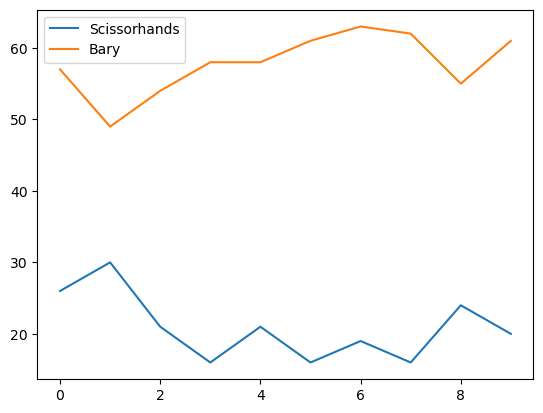

Final Belief: [0.2038835  0.10679612 0.68932039]


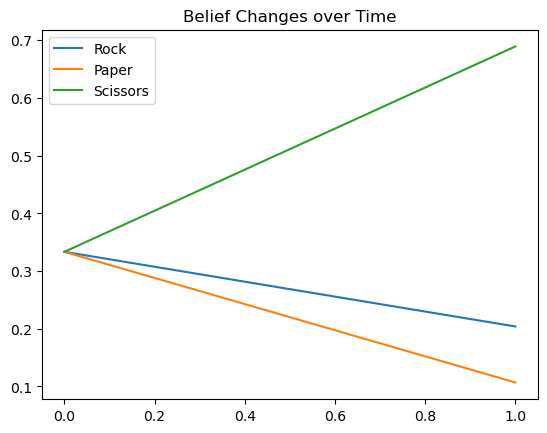

In [9]:
priors_record = []
bary_scissors = Bayes(name="Bary", record=priors_record)
priors_record.append(bary_scissors.priors)

scissorhands = Weighted(name="Scissorhands", weights=[2,2,6])

play_tournament(scissorhands, bary_scissors, num_games=10, num_rounds=100, print_plot=True)
print(f"Final Belief: {bary_scissors.priors}")
plot_priors(np.array(priors_record))

After playing Scissorhands, Bary became very convinced that the game is about beating scissors. As we can see the distribution has almost completely collapsed. Can it recover?


THEROCK        vs        Bary | Scissors



████████████████████████████████████████


Tournament Stats:
THEROCK       Draw       Bary | Scissors
10.57             9.88             79.55
----------------------------------------



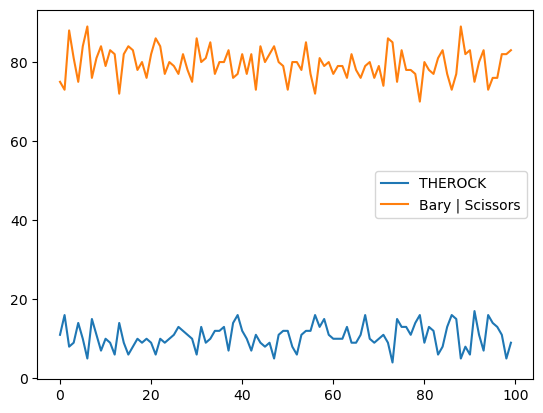

Final Belief: [0.54609929 0.28605201 0.1678487 ]


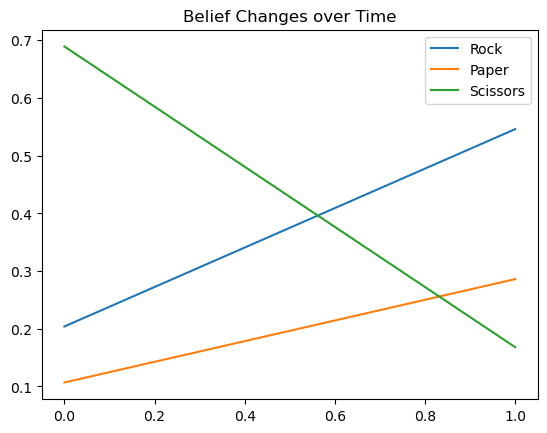

[7956.  988. 1056.]


In [10]:
priors_record = []
bary = Bayes(
    name="Bary | Scissors",
    priors=bary_scissors.priors, record=priors_record)
priors_record.append(bary.priors)

therock = Weighted(name="THEROCK", weights=[8,1,1])

play_tournament(therock, bary, num_games=100, num_rounds=100, print_plot=True)
print(f"Final Belief: {bary.priors}")
plot_priors(priors_record)
print(bary.counts)

Bary managed to recover as we can see in the distribution graph.

What about against a very erratic player who prefers rock and scissors? Mark (the Markov player) was able to learn something about their pattern of play. Can Bary do the same?


Rock & Scissors Rabble      vs      Bary



████████████████████████████████████████


Tournament Stats:
Rock & Scissors Rabble     Draw     Bary
35.82            14.23             49.95
----------------------------------------



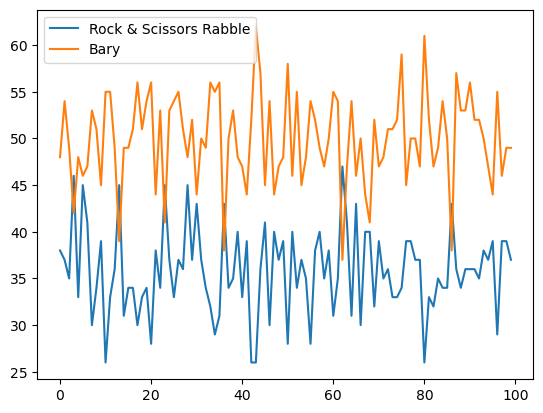

Final Belief: [0.49753695 0.10344828 0.39901478]


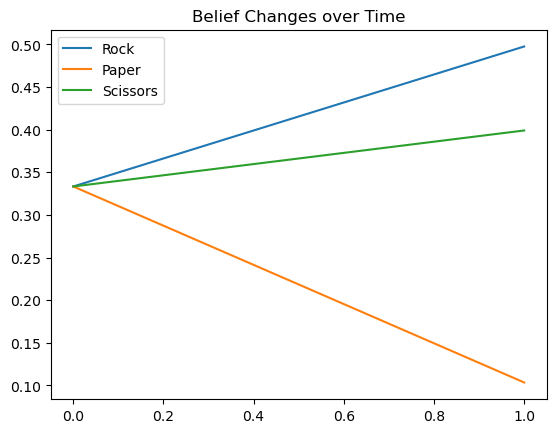

In [19]:
priors_record = []
bary = Bayes(name="Bary", record=priors_record)
priors_record.append(bary.priors)
rabble = Ensemble(name="Rock & Scissors Rabble", players=[scissorhands, therock])

play_tournament(rabble, bary, num_games=100, num_rounds=100, print_plot=True)
print(f"Final Belief: {bary.priors}")
plot_priors(priors_record)

Does Bary outperform Mark?


Mark               vs               Bary



████████████████████████████████████████


Tournament Stats:
Mark              Draw              Bary
99.40              0.30             0.30
----------------------------------------



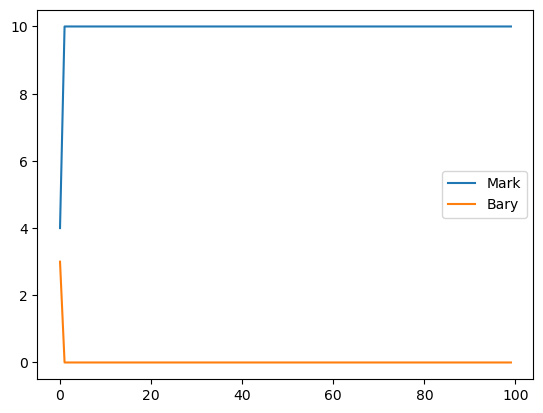

Final Belief: [0.15425639 0.74356433 0.10217927]


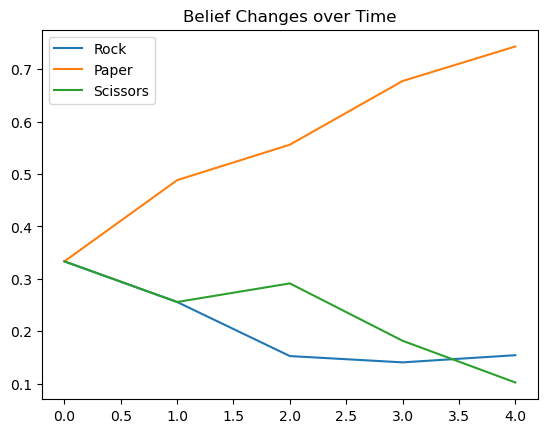

In [29]:
priors_record = []
bary = Bayes(name="Bary", priors=None, record=priors_record)
priors_record.append(bary.priors)

mark = Markov(name="Mark", num_moves=2)

play_tournament(mark, bary, num_games=100, num_rounds=10, print_plot=True)
print(f"Final Belief: {bary.priors}")
plot_priors(priors_record)

Not at all! This version of Bary has no history (doesn't remember opponent's moves) so Mark easily beats it.